## Importing Necessary Libararies and filtering warnings to maintain cleanlinnes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
movie_data = pd.read_csv('/content/IMDB_Dataset.csv')

## Loading the dataset

In [ ]:
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


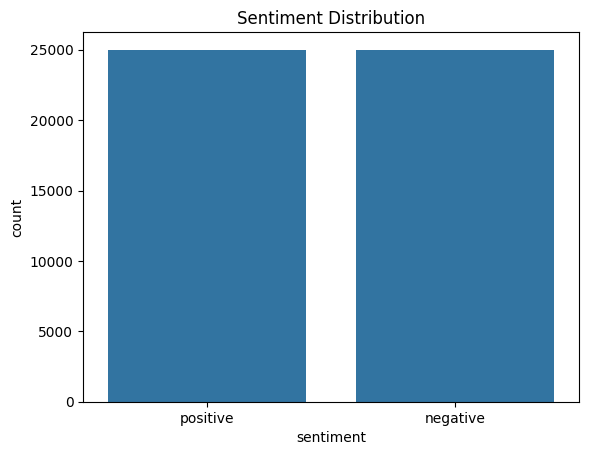

In [ ]:
sns.countplot(x='sentiment', data=movie_data)
plt.title("Sentiment Distribution")
plt.show()

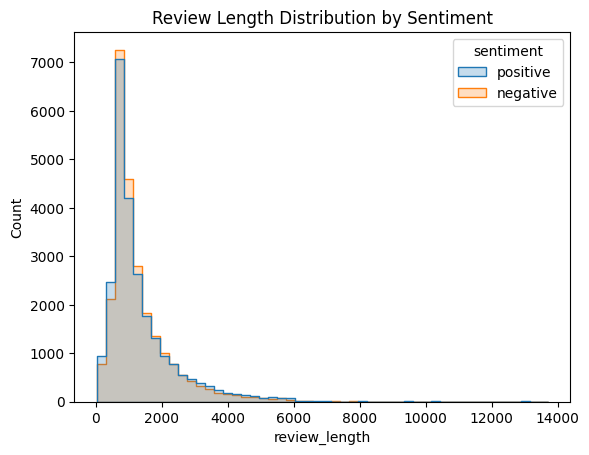

In [ ]:
movie_data['review_length'] = movie_data['review'].apply(len)
sns.histplot(data=movie_data, x="review_length", hue="sentiment", element="step", bins=50)
plt.title("Review Length Distribution by Sentiment")
plt.show()

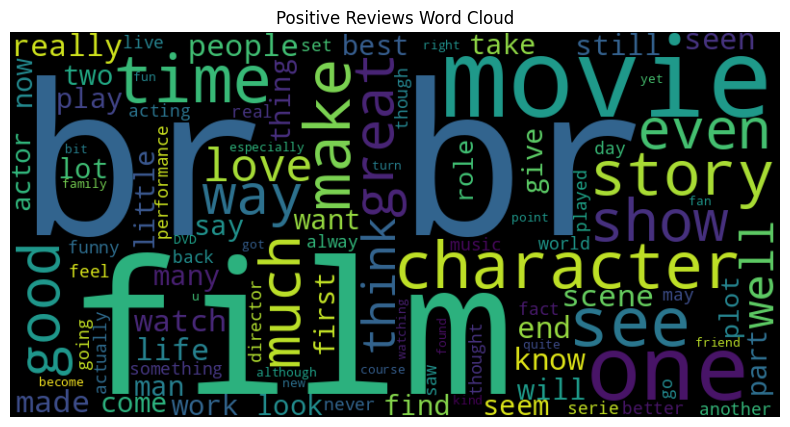

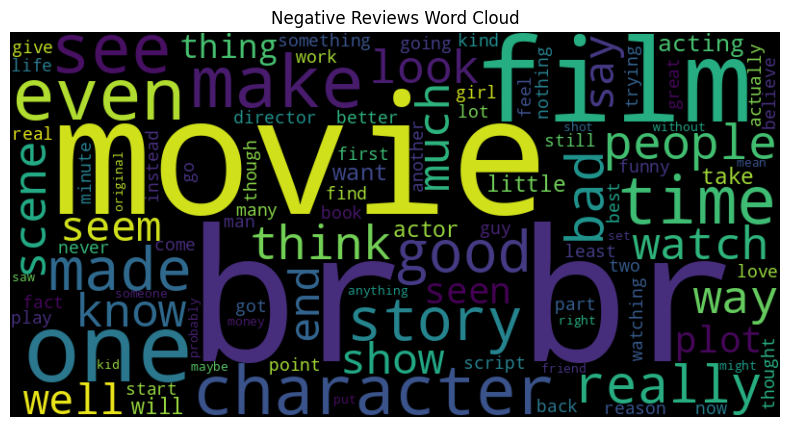

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join(movie_data[movie_data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(movie_data[movie_data['sentiment'] == 'negative']['review'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud")
plt.axis("off")
plt.show()

## Data Cleaning and Preprocessing


Clean the 'review' column by removing HTML tags ( br ) and other special characters using regular expressions. Convert text to lowercase, tokenize, remove stopwords, and apply lemmatization using the specified NLTK libraries. Also, drop any duplicate rows and null values from the dataset.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK libraries and data downloaded successfully.")

NLTK libraries and data downloaded successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added to download the missing resource

print("NLTK libraries and data downloaded successfully.")

NLTK libraries and data downloaded successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import pandas as pd

def preprocess_text(text):
    text = re.sub(r'<br\s*/>', ' ', text)    # 1. Remove HTML tags like '<br />'
    text = re.sub(r'[^a-zA-Z\s]', '', text)# 2. Remove special characters (anything not a letter or space)
    text = text.lower() # 3. Convert to lowercase
    tokens = word_tokenize(text) # 4. Tokenize the text

    # Initialize stop words and lemmatizer once for efficiency
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # 5. Remove stopwords and 6. Perform lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # 7. Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the preprocessing function to the 'review' column
movie_data['cleaned_review'] = movie_data['review'].apply(preprocess_text)

# Drop duplicate rows
initial_rows = movie_data.shape[0]
movie_data.drop_duplicates(inplace=True)
print(f"Dropped {initial_rows - movie_data.shape[0]} duplicate rows.")

# Drop rows with null values
initial_rows = movie_data.shape[0]
movie_data.dropna(inplace=True)
print(f"Dropped {initial_rows - movie_data.shape[0]} rows with null values.")

print("Preprocessing complete. Displaying head of the DataFrame with 'cleaned_review' column:")
display(movie_data.head())

Dropped 418 duplicate rows.
Dropped 0 rows with null values.
Preprocessing complete. Displaying head of the DataFrame with 'cleaned_review' column:


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


## Count Sentiment Distribution



Sentiment Distribution After Cleaning:
sentiment
positive    24884
negative    24698
Name: count, dtype: int64


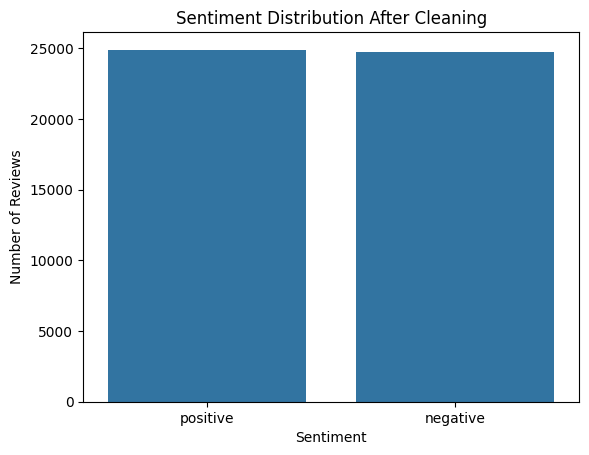

In [ ]:
sentiment_counts = movie_data['sentiment'].value_counts()
print("Sentiment Distribution After Cleaning:")
print(sentiment_counts)

sns.countplot(x='sentiment', data=movie_data)
plt.title("Sentiment Distribution After Cleaning")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer with specified parameters
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 2))

# Fit and transform the 'cleaned_review' column
X = tfidf_vectorizer.fit_transform(movie_data['cleaned_review'])

print("TF-IDF Vectorization complete. Shape of the feature matrix X:")
print(X.shape)


TF-IDF Vectorization complete. Shape of the feature matrix X:
(49582, 175520)


In [ ]:
from sklearn.model_selection import train_test_split

# Convert sentiment to numerical labels
y = movie_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (39665, 175520)
X_test shape: (9917, 175520)
y_train shape: (39665,)
y_test shape: (9917,)


## Model Training and Evaluation




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
print("Training Logistic Regression model...")
logistic_model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

# Make predictions on the test set
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"\nLogistic Regression Model Accuracy: {accuracy_lr:.4f}")
print("\nLogistic Regression Model Classification Report:")
print(report_lr)

Training Logistic Regression model...
Logistic Regression model training complete.

Logistic Regression Model Accuracy: 0.8950

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4940
           1       0.88      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.89      0.89      9917
weighted avg       0.90      0.90      0.90      9917



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
print("Training Random Forest model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest model training complete.")

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Model Classification Report:")
print(report_rf)

Training Random Forest model...
Random Forest model training complete.

Random Forest Model Accuracy: 0.8611

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4940
           1       0.86      0.87      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



## Test with a New Review and Compare Model Predictions

In [ ]:
def predict_sentiment_for_review(review_text):
    # 1. Preprocess the input review
    cleaned_input_review = preprocess_text(review_text)
    print(f"\nOriginal Review: {review_text}")
    print(f"Cleaned Review: {cleaned_input_review}")

    # 2. Vectorize the cleaned review using the trained TF-IDF vectorizer
    # The input needs to be in a list format for the transform method
    vectorized_input = tfidf_vectorizer.transform([cleaned_input_review])

    # 3. Predict sentiment using Logistic Regression
    pred_lr = logistic_model.predict(vectorized_input)[0]
    sentiment_lr = 'positive' if pred_lr == 1 else 'negative'

    # 4. Predict sentiment using Random Forest
    pred_rf = random_forest_model.predict(vectorized_input)[0]
    sentiment_rf = 'positive' if pred_rf == 1 else 'negative'

    results = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest'],
        'Predicted Sentiment': [sentiment_lr, sentiment_rf]
    })

    print("\nModel Predictions:")
    display(results)

random_review = "This movie was absolutely fantastic! I loved every single moment of it. The acting was superb and the plot was incredibly engaging."
predict_sentiment_for_review(random_review)

random_review_2 = "The movie was terrible, a complete waste of time. The plot made no sense and the actors were awful."
predict_sentiment_for_review(random_review_2)

random_review_3 = "It was an okay film, nothing spectacular, but not bad either. A bit slow at times."
predict_sentiment_for_review(random_review_3)


Original Review: This movie was absolutely fantastic! I loved every single moment of it. The acting was superb and the plot was incredibly engaging.
Cleaned Review: movie absolutely fantastic loved every single moment acting superb plot incredibly engaging

Model Predictions:


,Model,Predicted Sentiment
0,Logistic Regression,positive
1,Random Forest,positive



Original Review: The movie was terrible, a complete waste of time. The plot made no sense and the actors were awful.
Cleaned Review: movie terrible complete waste time plot made sense actor awful

Model Predictions:


,Model,Predicted Sentiment
0,Logistic Regression,negative
1,Random Forest,negative



Original Review: It was an okay film, nothing spectacular, but not bad either. A bit slow at times.
Cleaned Review: okay film nothing spectacular bad either bit slow time

Model Predictions:


,Model,Predicted Sentiment
0,Logistic Regression,negative
1,Random Forest,negative
